In [1]:
import os
import sys 

os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.sql.warehouse.dir", "C:/Users/JSM")\
    .getOrCreate()

In [8]:
#주택가격 예측
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
boston=datasets.load_boston()

print(boston.keys())


print(boston.data.shape)
print(boston.DESCR)[:1000]

print(boston.feature_names)


['filename', 'data', 'target', 'DESCR', 'feature_names']
(506L, 13L)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TA

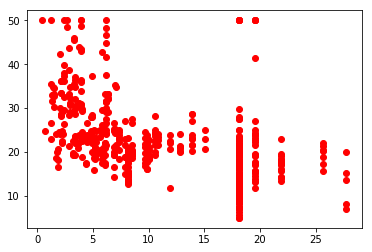

In [7]:
#주택가격 그래프
%matplotlib inline 

import matplotlib.pyplot as plt
plt.scatter(boston.data[:,2],boston.target,color='r')
plt.show()

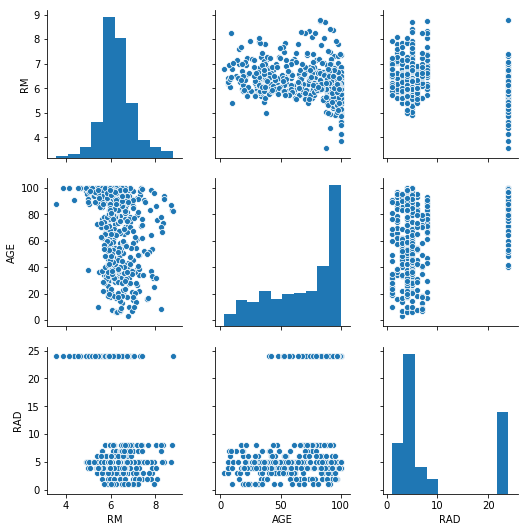

In [9]:
import pandas as pd #데이터 -> 판다스로
X=pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

Y = pd.DataFrame(boston.target, columns=["MEDV"])
Y.head()

#연관성 탐색
import seaborn as sns
cols = ["RM", "AGE", "RAD"]
sns.pairplot(X[cols])
plt.show()

In [10]:
X.describe() #결측값 찾기

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


25.79036215070252
(array([[-9.28965170e-02],
       [ 4.87149552e-02],
       [-4.05997958e-03],
       [ 2.85399882e+00],
       [-2.86843637e+00],
       [ 5.92814778e+00],
       [-7.26933458e-03],
       [-9.68514157e-01],
       [ 1.71151128e-01],
       [-9.39621540e-03],
       [-3.92190926e-01],
       [ 1.49056102e-02],
       [-4.16304471e-01]]), array([12228.04626104]), 13, array([1.25851816e+04, 3.44597406e+03, 6.45757109e+02, 4.02050461e+02,
       1.58964612e+02, 1.21502936e+02, 9.04652420e+01, 7.79311708e+01,
       6.50828345e+01, 2.46251803e+01, 1.80945451e+01, 5.51505065e+00,
       1.48096916e+00]))


C:\Users\JSM\Anaconda2\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


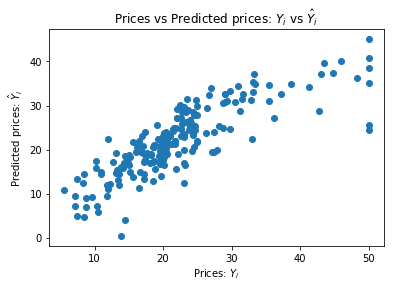

In [17]:
#훈련데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


#모델링
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

Y_pred.shape

Y_pred.view()[:5]

plt.scatter(Y_test,Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

#오류

import sklearn
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

#numpy listsq

import numpy as np
xarr=np.array(X)
yarr=np.array(Y)
print np.linalg.lstsq(xarr,yarr)

In [20]:
#sklearn Lasso

from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold, cross_val_score

lasso = LassoCV(cv=3)
yhat_lasso = lasso.fit(xarr,yarr.ravel())

print yhat_lasso

yhat_lasso.coef_

##연습으로 실행
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

print(clf.coef_, clf.intercept_)

print clf.predict([[3,3],[4,4]]) #예측값

LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)
(array([0.85, 0.  ]), 0.15000000000000002)
[2.7  3.55]


0.7406421899248055


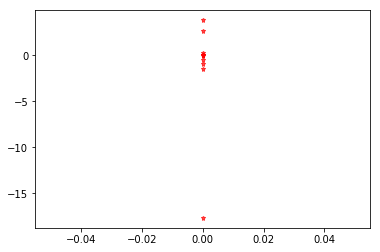

In [21]:
#Ridge

from sklearn.linear_model import Ridge

r = Ridge(alpha=0.01)
r.fit(xarr, yarr)
print(r.score(xarr, yarr))

r.coef_

import matplotlib.pyplot as plt
plt.plot(r.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)

In [22]:
#StatsModel

import statsmodels.api as sm
# Fit and make the predictions by the model
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 17 Dec 2019   Prob (F-statistic):                        0.00
Time:                        05:47:04   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""